In [82]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

In [83]:
data=pd.read_csv('mnist_train1.csv')



In [84]:
X=data.drop(columns=['label'])
y=data['label']

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [87]:
mod=GaussianNB()
mod.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [88]:
y_pred=mod.predict(X_test)

In [89]:
mod.var_

array([[1.99209304e-10, 1.99209304e-10, 1.99209304e-10, ...,
        1.99209304e-10, 1.99209304e-10, 1.99209304e-10],
       [1.99209304e-10, 1.99209304e-10, 1.99209304e-10, ...,
        1.99209304e-10, 1.99209304e-10, 1.99209304e-10],
       [1.99209304e-10, 1.99209304e-10, 1.99209304e-10, ...,
        1.99209304e-10, 1.99209304e-10, 1.99209304e-10],
       ...,
       [1.99209304e-10, 1.99209304e-10, 1.99209304e-10, ...,
        1.99209304e-10, 1.99209304e-10, 1.99209304e-10],
       [1.99209304e-10, 1.99209304e-10, 1.99209304e-10, ...,
        1.99209304e-10, 1.99209304e-10, 1.99209304e-10],
       [1.99209304e-10, 1.99209304e-10, 1.99209304e-10, ...,
        1.99209304e-10, 1.99209304e-10, 1.99209304e-10]], shape=(10, 784))

In [90]:
np.round(mod.theta_[0],10)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.21894300e-04,
       2.40931700e-04, 9.90391000e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [91]:
mod.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
class_idx=list(mod.classes_).index(1)
mu=mod.theta_[class_idx]
var=mod.var_[class_idx]

In [93]:
sample=np.random.normal(mu,np.sqrt(var))
import matplotlib.pyplot as plt
sample=np.clip(sample,0,1)

<function matplotlib.pyplot.show(close=None, block=None)>

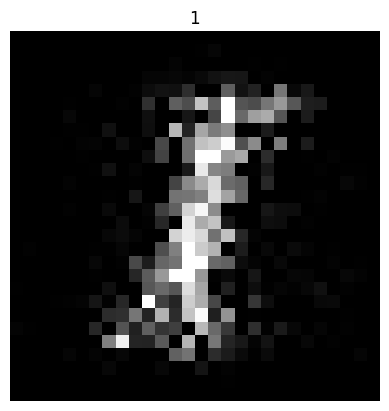

In [94]:
plt.imshow(sample.reshape(28,28),cmap='gray')
plt.title('1')
plt.axis('off')
plt.show

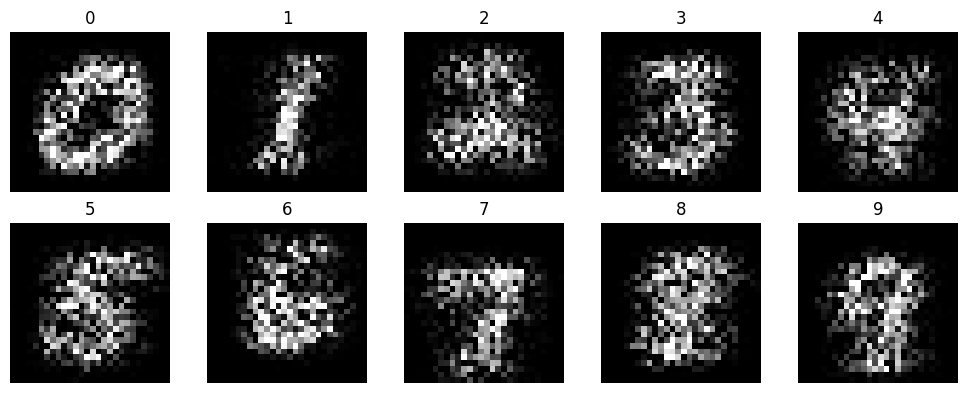

In [95]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  # 2 rows, 5 columns
axes=axes.ravel()
for i in mod.classes_:
    mu=mod.theta_[i]
    var=mod.var_[i]
    sample=np.random.normal(mu,np.sqrt(var))
    sample=np.clip(sample,0,1)
    axes[i].imshow(sample.reshape(28,28),cmap='gray')
    axes[i].set_title(str(i))
    axes[i].axis('off')
plt.tight_layout()
plt.show()
    